# Heart Disease Prediction


In [34]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
import plotly.offline as py
import pandas_profiling 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [35]:
## Reading the dataset

df = pd.read_csv("Heart.csv")

In [36]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [37]:
df.shape

(303, 14)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**By looking into above information** 

- we can say that there are no `NULL values`,

- There are `303 rows` and `14 columns` 

- All the varibales are the integer type and float , there are no object type  varibles


In [39]:
## Statistical Properties of the data set

pd.set_option("display.float","{:.2f}".format)
df.describe()


age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
count 303.00 303.00 303.00    303.00 303.00 303.00   303.00   303.00 303.00   
mean   54.37   0.68   0.97    131.62 246.26   0.15     0.53   149.65   0.33   
std     9.08   0.47   1.03     17.54  51.83   0.36     0.53    22.91   0.47   
min    29.00   0.00   0.00     94.00 126.00   0.00     0.00    71.00   0.00   
25%    47.50   0.00   0.00    120.00 211.00   0.00     0.00   133.50   0.00   
50%    55.00   1.00   1.00    130.00 240.00   0.00     1.00   153.00   0.00   
75%    61.00   1.00   2.00    140.00 274.50   0.00     1.00   166.00   1.00   
max    77.00   1.00   3.00    200.00 564.00   1.00     2.00   202.00   1.00   

       oldpeak  slope     ca   thal  target  
count   303.00 303.00 303.00 303.00  303.00  
mean      1.04   1.40   0.73   2.31    0.54  
std       1.16   0.62   1.02   0.61    0.50  
min       0.00   0.00   0.00   0.00    0.00  
25%       0.00   1.00   0.00   2.00    0.00  
50%       0.80   1.00   0.00   2.00    1.00  
75%       1.60   2.00   1.00   3.00    1.00  
max       6.20   2.00   4.00   3.00    1.00

### Dataset Info:

**`Heart.csv:`**

**The dataset contains 14 columns which are as follows:**

- `age` : age in years<br>

- `sex` : (1 = male; 0 = female)<br>
- `cp` : chest pain type<br>
- `trestbps` : resting blood pressure (in mm Hg on admission to the hospital)<br>
-  `chol` : serum cholesterol in mg/dl<br>
- `fbs` : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br>
- `restecg` : resting electrocardiographic results<br>
- `thalach` : maximum heart rate achieved<br>
- `exang` : exercise induced angina (1 = yes; 0 = no)<br>
- `oldpeak` : ST depression induced by exercise relative to rest<br>
- `slope` : the slope of the peak exercise ST segment<br>
- `ca` : number of major vessels (0-3) colored by fluoroscopy<br>
- `thal` : 3 = normal; 6 = fixed defect; 7 = reversible defect<br>
- `target` : 1 or 0<br>


### **1. How many are suffering from heart disease? Also plot the stats.**

In [40]:
pandas_profiling .ProfileReport(df)

In [41]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0     2.30      0   
1   37    1   2       130   250    0        1      187      0     3.50      0   
2   41    0   1       130   204    0        0      172      0     1.40      2   
3   56    1   1       120   236    0        1      178      0     0.80      2   
4   57    0   0       120   354    0        1      163      1     0.60      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [42]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

HERE **`1`** indicates the **`YES`**, by seeing above information there are `165` members are `sufferig with heartattack,`

and **`0`** indicates the **`NO`**, by looking above information there are `138` members are `not suffering with heartattack`

**For Readability, need to variable(1 = male; 0 = female)  0 and 1 into female and male respectively, This will make easy understandable**


<AxesSubplot:>

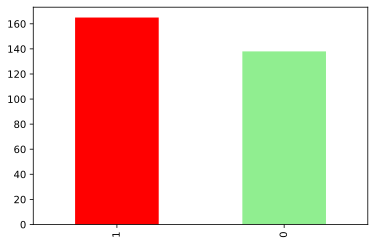

In [43]:
df.target.value_counts().plot(kind="bar",color=["red","lightgreen"])

In [44]:
categorical_val = []
continuous_val = []
for column  in df.columns:
    print('#########################################################################################')
    print(f"{column}:{df[column].unique()}")
    if len(df[column].unique()) <=10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)

#########################################################################################
age:[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
#########################################################################################
sex:[1 0]
#########################################################################################
cp:[3 2 1 0]
#########################################################################################
trestbps:[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
#########################################################################################
chol:[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 

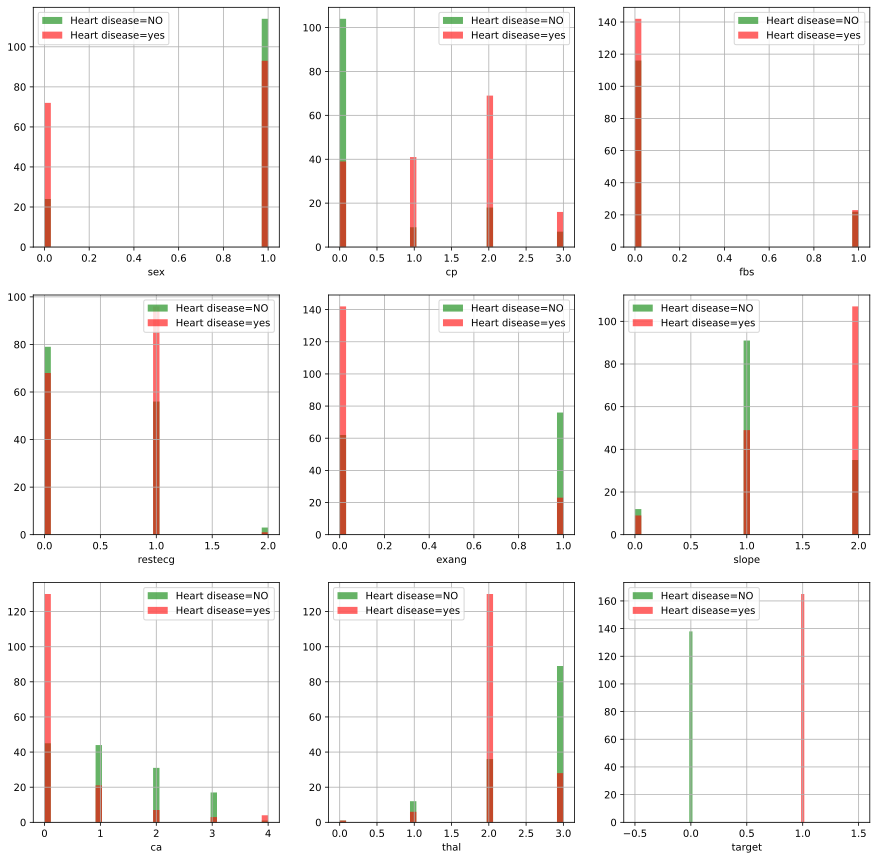

In [45]:
plt.figure(figsize = (15,15))

for i, column in enumerate(categorical_val,1):
    plt.subplot(3,3,i)
    df[df["target"]==0][column].hist(bins = 35,color ='green',label = 'Heart disease=NO',alpha=0.6)
    df[df["target"]==1][column].hist(bins = 35,color = 'red',label = 'Heart disease=yes',alpha=0.6)
    plt.legend()
    plt.xlabel(column)

**alpha keyword is to determine the plot with more number variables to differ with colors in a single plotting section. alpha value is adjustable according to our usage**

**Observations from the above plot:**

1. cp {Chest pain}: People with cp 1, 2, 3 are more likely to have heart disease than people with cp 0.
2. restecg {resting EKG results}: People with a value of 1 (reporting an abnormal heart rhythm, which can range from mild symptoms to severe problems) are more likely to have heart disease.
3. exang {exercise-induced angina}: people with a value of 0 (No ==> angina induced by exercise) have more heart disease than people with a value of 1 (Yes ==> angina induced by exercise)
4. slope {the slope of the ST segment of peak exercise}: People with a slope value of 2 (Downslopins: signs of an unhealthy heart) are more likely to have heart disease than people with a slope value of 2 slope is 0 (Upsloping: best heart rate with exercise) or 1 (Flatsloping: minimal change (typical healthy heart)).
5. ca {number of major vessels (0-3) stained by fluoroscopy}: the more blood movement the better, so people with ca equal to 0 are more likely to have heart disease.
6. thal {thalium stress result}: People with a thal value of 2 (defect corrected: once was a defect but ok now) are more likely to have heart disease.


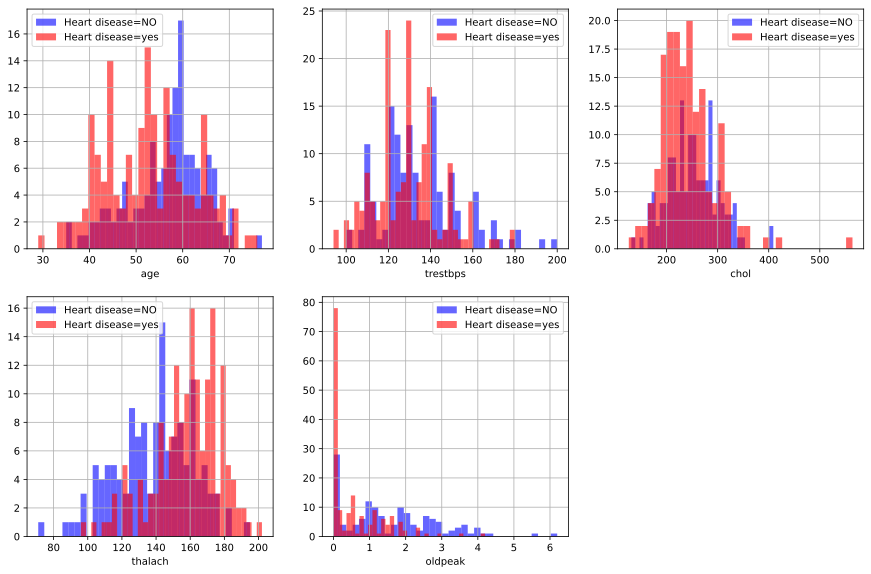

In [46]:
plt.figure(figsize = (15,15))

for i, column in enumerate(continuous_val,1):
    plt.subplot(3,3,i)
    df[df["target"]==0][column].hist(bins = 35,color ='blue',label = 'Heart disease=NO',alpha=0.6)
    df[df["target"]==1][column].hist(bins = 35,color = 'red',label = 'Heart disease=yes',alpha=0.6)
    plt.legend()
    plt.xlabel(column)

**Observations from the above plot:**

1. trestbps: resting blood pressure anything above 130-140 is generally of concern
2. chol: greater than 200 is of concern.
3. thalach: People with a maximum of over 140 are more likely to have heart disease.
4. the old peak of exercise-induced ST depression vs. rest looks at heart stress during exercise an unhealthy heart will stress more.


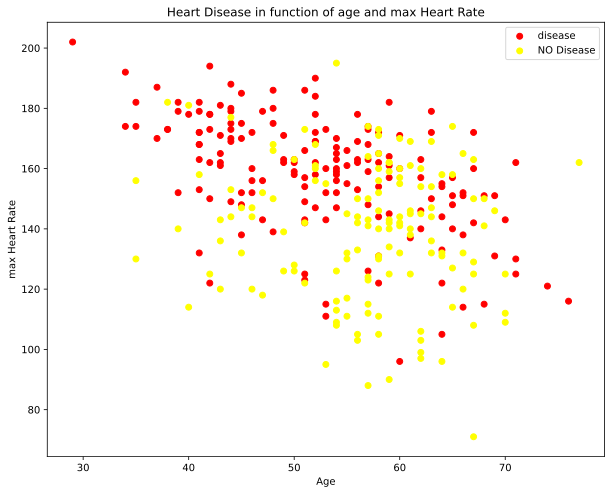

In [47]:
# create another 
plt.figure(figsize = (10,8))

#scatter with postive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="red")

#scatter with negative examples
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target==0],
           c="yellow")

#add some helpful info
plt.title("Heart Disease in function of age and max Heart Rate")
plt.xlabel('Age')
plt.ylabel("max Heart Rate")
plt.legend(["disease","NO Disease"]);

## correlation matrix

(14.5, -0.5)

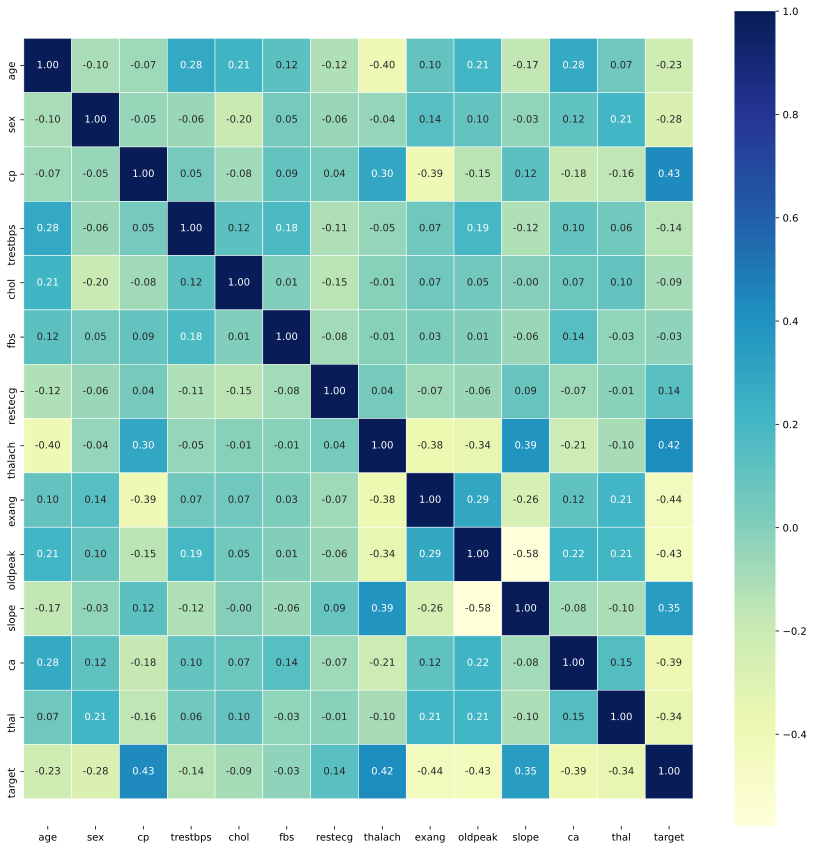

In [48]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize = (15,15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth =0.5,
                 fmt =".2f",
                 cmap="YlGnBu");
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

<AxesSubplot:title={'center':'Correlation with target'}>

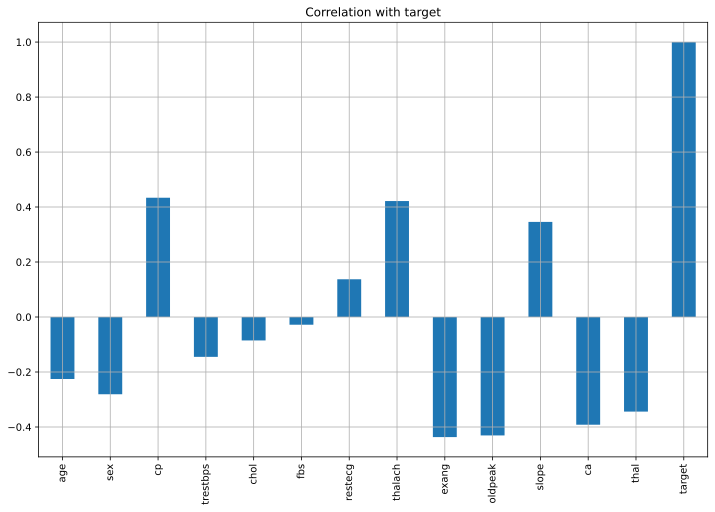

In [49]:
df.corrwith(df.target).plot(kind='bar',grid=True,figsize=(12,8),
                                                title = "Correlation with target")


In [50]:
# Data Processing
categorical_val.remove('target')

dataset = pd.get_dummies(df,columns=categorical_val)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
col_scale = ['age','trestbps','chol','thalach','oldpeak']
dataset[col_scale]=scaler.fit_transform(dataset[col_scale])

In [51]:
# Logistic Regression

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


def print_score(clf,X_train,y_train,X_test,y_test,train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict = True))
        print("Train result:\n**********************************************************")
        print(f"Accuracy score:{accuracy_score(y_train,pred)*100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("___________________________________________________________________________")
        print(f"Confusion Matrix: \n{confusion_matrix(y_train,pred)}\n")
    
    elif train == False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
        print("Test Result:\n****************************************************************")
        print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
        print("_______________________________________________________________________________")
        print(f"CLASSICATION REPORT:\n{clf_report}")
        print(f"Confusion Matrix: \n{confusion_matrix(y_test,pred)}\n")
    

In [52]:
# splitting the data into training ans test sets.

from sklearn.model_selection import train_test_split

y=dataset.target
X=dataset.drop('target',axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=42)


from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train,y_train)


print_score(lr_clf,X_train,y_train,X_test,y_test,train=True)
print_score(lr_clf,X_train,y_train,X_test,y_test,train=False)

Train result:
**********************************************************
Accuracy score:86.79%
__________________________________________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  0.88   0.86      0.87       0.87          0.87
recall     0.82   0.90      0.87       0.86          0.87
f1-score   0.85   0.88      0.87       0.87          0.87
support   97.00 115.00      0.87     212.00        212.00
___________________________________________________________________________
Confusion Matrix: 
[[ 80  17]
 [ 11 104]]

Test Result:
****************************************************************
Accuracy score:86.81%
_______________________________________________________________________________
CLASSICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.87  0.87      0.87       0.87          0.87
recall     0.83  0.90      0.87       0.86          0.87
f1-score   0.85  0.88     

In [53]:
test_score =accuracy_score(y_test,lr_clf.predict(X_test))*100
train_score = accuracy_score(y_train,lr_clf.predict(X_train))*100

results_df = pd.DataFrame(data=[["Logistic Regression",train_score,test_score]],
                        columns = ['Model','Training Accuracy %','Test Accuracy %'])

results_df

Model  Training Accuracy %  Test Accuracy %
0  Logistic Regression                86.79            86.81